<a href="https://colab.research.google.com/github/daisytatiana/Talent_Tech_Daisy_Casallas/blob/main/Notebook_Analisis_Seies_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
!pip install statsmodels
import statsmodels.api as sm

In [2]:
url = '/content/Copia de 1.1.1.TCM_Serie historica IQY.xlsx'

In [3]:
df = pd.read_excel(url, sheet_name='Sheet1')

In [4]:
df

,Fecha (dd/mm/aaaa),Tasa de cambio representativa del mercado (TRM)
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42
...,...,...
12001,2024-10-05,4173.66
12002,2024-10-06,4173.66
12003,2024-10-07,4173.66
12004,2024-10-08,4194.97


In [5]:
# Convertir la columna de fecha a datetime si no lo está ya
df['Fecha (dd/mm/aaaa)'] = pd.to_datetime(df['Fecha (dd/mm/aaaa)'])

# Filtrar por el mes y año deseados
filtered_df = df[(df['Fecha (dd/mm/aaaa)'].dt.year == 2016) & (df['Fecha (dd/mm/aaaa)'].dt.month == 2)]

print(filtered_df)

     Fecha (dd/mm/aaaa)  Tasa de cambio representativa del mercado (TRM)
8832         2016-02-01                                          3287.31
8833         2016-02-02                                          3326.82
8834         2016-02-03                                          3387.69
8835         2016-02-04                                          3382.20
8836         2016-02-05                                          3315.75
8837         2016-02-06                                          3320.49
8838         2016-02-07                                          3320.49
8839         2016-02-08                                          3320.49
8840         2016-02-09                                          3367.02
8841         2016-02-10                                          3391.93
8842         2016-02-11                                          3385.65
8843         2016-02-12                                          3434.89
8844         2016-02-13                            

In [6]:
# Valores al cierre de cada mes.
df_end_of_month = df.groupby(df['Fecha (dd/mm/aaaa)'].dt.to_period('M')).last()
print(df_end_of_month)

                   Fecha (dd/mm/aaaa)  \
Fecha (dd/mm/aaaa)                      
1991-11                    1991-11-30   
1991-12                    1991-12-31   
1992-01                    1992-01-31   
1992-02                    1992-02-29   
1992-03                    1992-03-31   
...                               ...   
2024-06                    2024-06-30   
2024-07                    2024-07-31   
2024-08                    2024-08-31   
2024-09                    2024-09-30   
2024-10                    2024-10-09   

                    Tasa de cambio representativa del mercado (TRM)  
Fecha (dd/mm/aaaa)                                                   
1991-11                                                      694.70  
1991-12                                                      632.37  
1992-01                                                      644.27  
1992-02                                                      636.54  
1992-03                                       

In [7]:
# Valores al cierre de cada trimestre.
df_end_of_quarter = df.groupby(df['Fecha (dd/mm/aaaa)'].dt.to_period('Q')).last()
print(df_end_of_quarter)

                   Fecha (dd/mm/aaaa)  \
Fecha (dd/mm/aaaa)                      
1991Q4                     1991-12-31   
1992Q1                     1992-03-31   
1992Q2                     1992-06-30   
1992Q3                     1992-09-30   
1992Q4                     1992-12-31   
...                               ...   
2023Q4                     2023-12-31   
2024Q1                     2024-03-31   
2024Q2                     2024-06-30   
2024Q3                     2024-09-30   
2024Q4                     2024-10-09   

                    Tasa de cambio representativa del mercado (TRM)  
Fecha (dd/mm/aaaa)                                                   
1991Q4                                                       632.37  
1992Q1                                                       641.59  
1992Q2                                                       697.57  
1992Q3                                                       702.81  
1992Q4                                        

In [8]:
# desplazando el 1 dia el valor de cierre
desplazado = df['Tasa de cambio representativa del mercado (TRM)'].shift(1)
desplazado[:5]

,Tasa de cambio representativa del mercado (TRM)
0,NaN
1,693.32
2,693.99
3,694.70
4,694.70


In [9]:
# calculando el porcentaje de variación del día.
variacion_diaria = df['Tasa de cambio representativa del mercado (TRM)'] / df['Tasa de cambio representativa del mercado (TRM)'].shift(1) - 1
df['var_diaria'] = variacion_diaria
df['var_diaria'][:5]

,var_diaria
0,NaN
1,0.000966
2,0.001023
3,0.000000
4,-0.073816


In [10]:
# mismo resultado utilizando pct_change()
df['Tasa de cambio representativa del mercado (TRM)'].pct_change()[:5]

,Tasa de cambio representativa del mercado (TRM)
0,NaN
1,0.000966
2,0.001023
3,0.000000
4,-0.073816


In [11]:
# calculando rendimiento acumulado diario
rendimiento_diario = (1 + df['Tasa de cambio representativa del mercado (TRM)'].pct_change()).cumprod()
df['rend_diario'] = rendimiento_diario
df['rend_diario'][:5]

,rend_diario
0,NaN
1,1.000966
2,1.001990
3,1.001990
4,0.928027


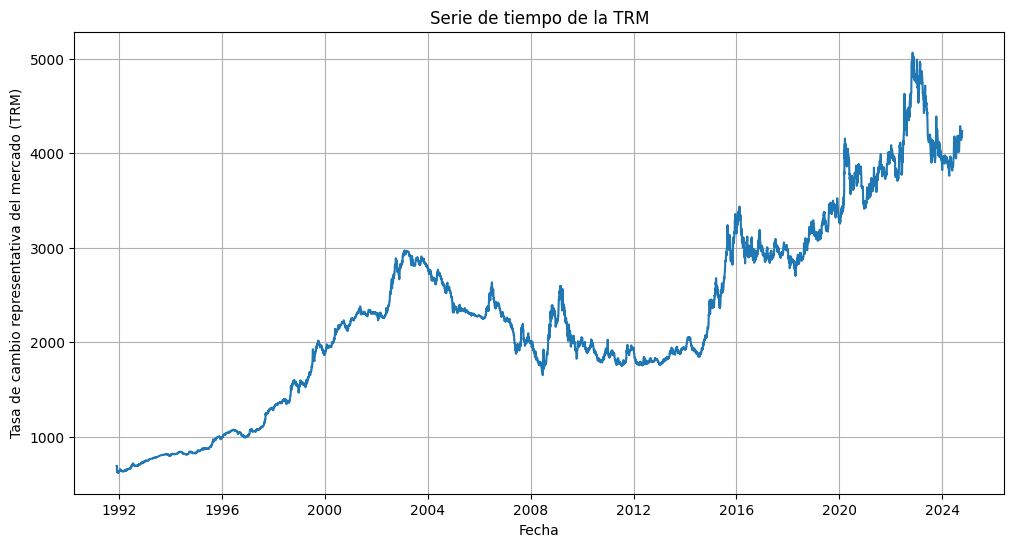

In [12]:
# Grafica la serie de tiempo de df
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha (dd/mm/aaaa)'], df['Tasa de cambio representativa del mercado (TRM)'])
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio representativa del mercado (TRM)')
plt.title('Serie de tiempo de la TRM')
plt.grid(True)
plt.show()

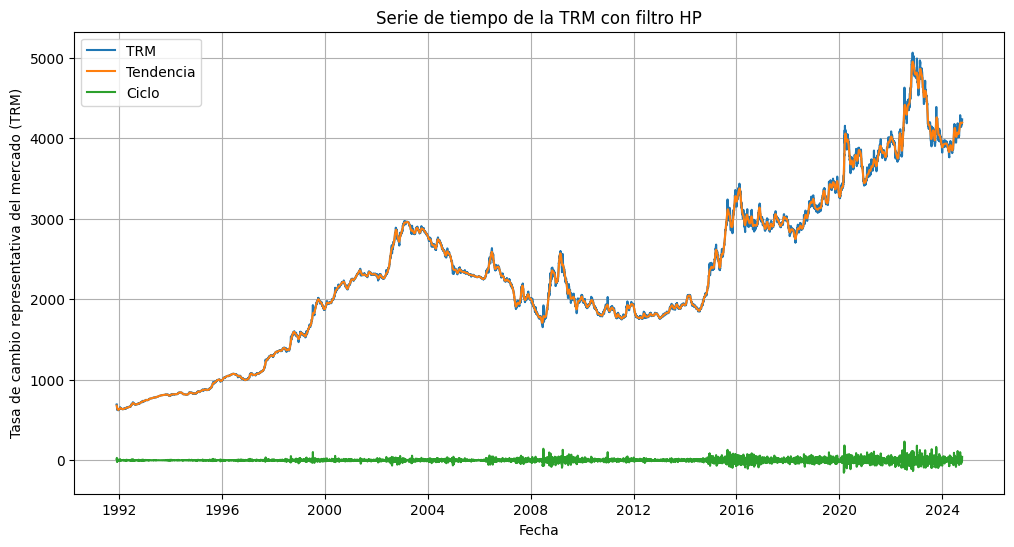

In [13]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Aplica el filtro HP a la columna de la TRM
cycle, trend = hpfilter(df['Tasa de cambio representativa del mercado (TRM)'], lamb=1600)

# Agrega las columnas de tendencia y ciclo al DataFrame
df['trend'] = trend
df['cycle'] = cycle

# Grafica la serie de tiempo original, la tendencia y el ciclo
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha (dd/mm/aaaa)'], df['Tasa de cambio representativa del mercado (TRM)'], label='TRM')
plt.plot(df['Fecha (dd/mm/aaaa)'], df['trend'], label='Tendencia')
plt.plot(df['Fecha (dd/mm/aaaa)'], df['cycle'], label='Ciclo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio representativa del mercado (TRM)')
plt.title('Serie de tiempo de la TRM con filtro HP')
plt.legend()
plt.grid(True)
plt.show()

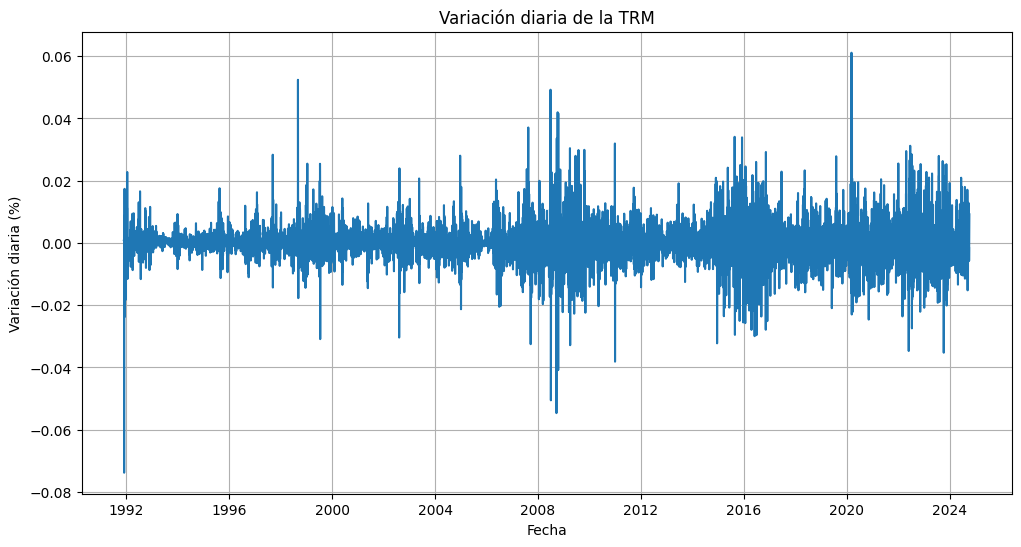

In [14]:
# porcentaje de variacion diario

plt.figure(figsize=(12, 6))
plt.plot(df['Fecha (dd/mm/aaaa)'], df['var_diaria'])
plt.xlabel('Fecha')
plt.ylabel('Variación diaria (%)')
plt.title('Variación diaria de la TRM')
plt.grid(True)
plt.show()

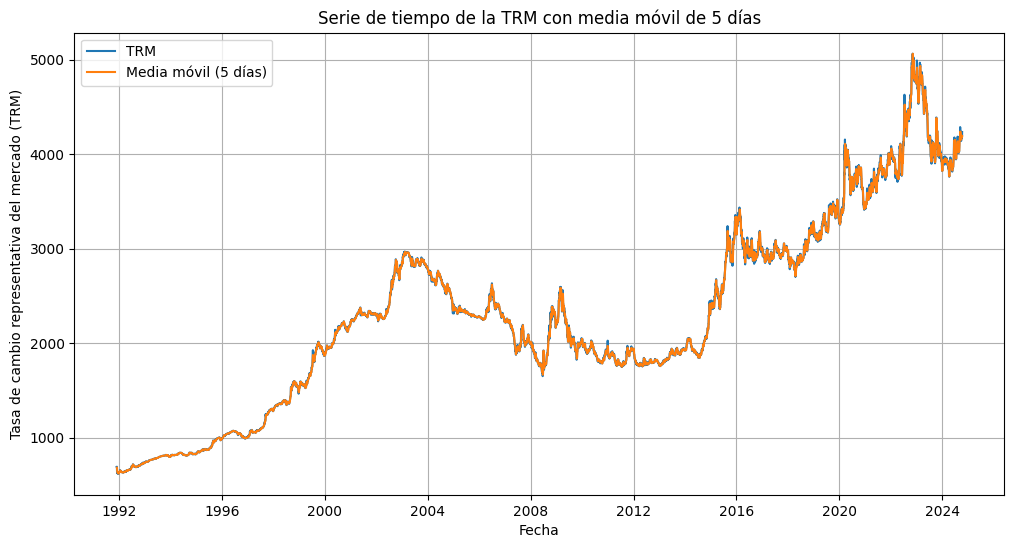

In [15]:
# promedios móviles cada 5 días

# Calculando promedios móviles cada 5 días
df['media_movil_5d'] = df['Tasa de cambio representativa del mercado (TRM)'].rolling(window=5).mean()

# Graficando la serie original y la media móvil
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha (dd/mm/aaaa)'], df['Tasa de cambio representativa del mercado (TRM)'], label='TRM')
plt.plot(df['Fecha (dd/mm/aaaa)'], df['media_movil_5d'], label='Media móvil (5 días)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio representativa del mercado (TRM)')
plt.title('Serie de tiempo de la TRM con media móvil de 5 días')
plt.legend()
plt.grid(True)
plt.show()

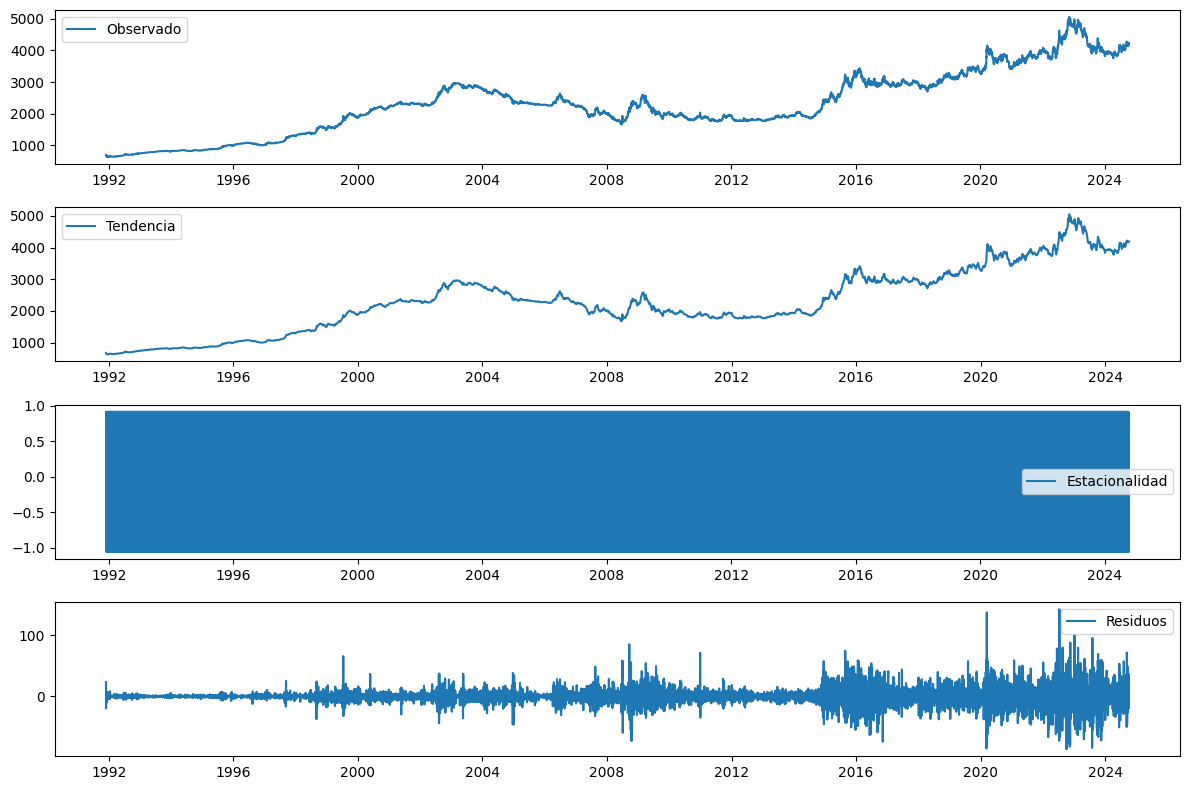

In [16]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Fecha (dd/mm/aaaa)' is your date column
# 1. Convert 'Fecha (dd/mm/aaaa)' to datetime objects and set it as the index
df['Fecha (dd/mm/aaaa)'] = pd.to_datetime(df['Fecha (dd/mm/aaaa)'], format='%d/%m/%Y')
df.set_index('Fecha (dd/mm/aaaa)', inplace=True)

# 2. Infer the frequency if it's not automatically detected
#    Replace 'D' with the appropriate frequency (e.g., 'M' for monthly, 'Y' for yearly)
df = df.asfreq('D')

# 3. Perform seasonal decomposition
result = seasonal_decompose(df['Tasa de cambio representativa del mercado (TRM)'], model='additive')

# 4. Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observado')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Tendencia')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Residuos')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Descomposición de la serie de tiempo
# Esta gráfica divide la serie de tiempo de la TRM en cuatro componentes:
# - Observado: La serie de tiempo original.
# - Tendencia: La evolución general a largo plazo de la TRM.
# - Estacionalidad: Cualquier patrón repetitivo o estacionalidad presente en la serie de tiempo (en este caso, no se observa).
# - Residuos: La parte aleatoria de la serie, después de eliminar la tendencia y la estacionalidad.
# Esta descomposición ayuda a entender las diferentes fuerzas que influyen en el comportamiento de la TRM, incluyendo la tendencia, la estacionalidad y el ruido aleatorio.


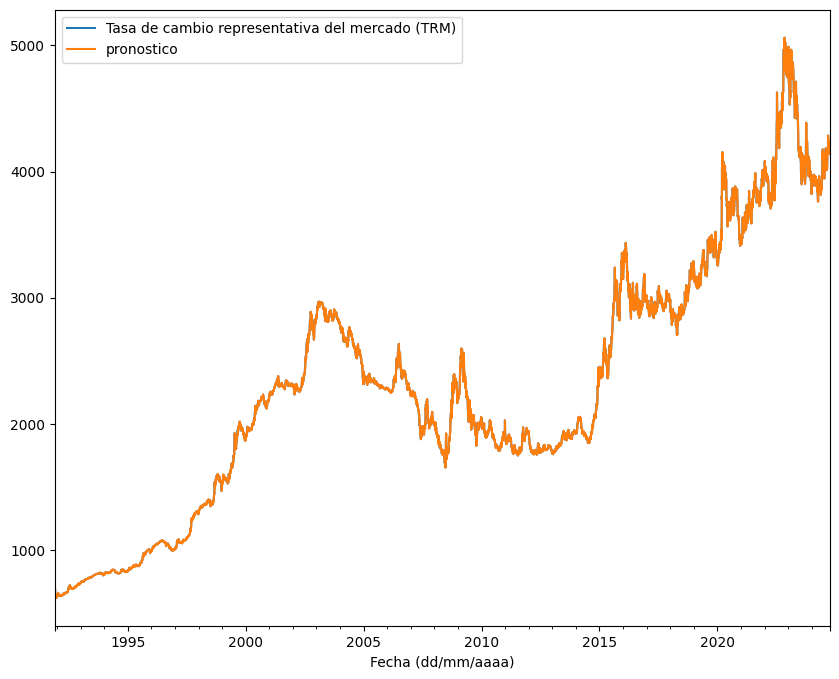

In [18]:
# Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(df['Tasa de cambio representativa del mercado (TRM)'].iloc[1:], order=(1, 0, 0))
resultados = modelo.fit()  # Remove the 'disp' argument
df['pronostico'] = resultados.fittedvalues
plot = df[['Tasa de cambio representativa del mercado (TRM)', 'pronostico']].plot(figsize=(10, 8))

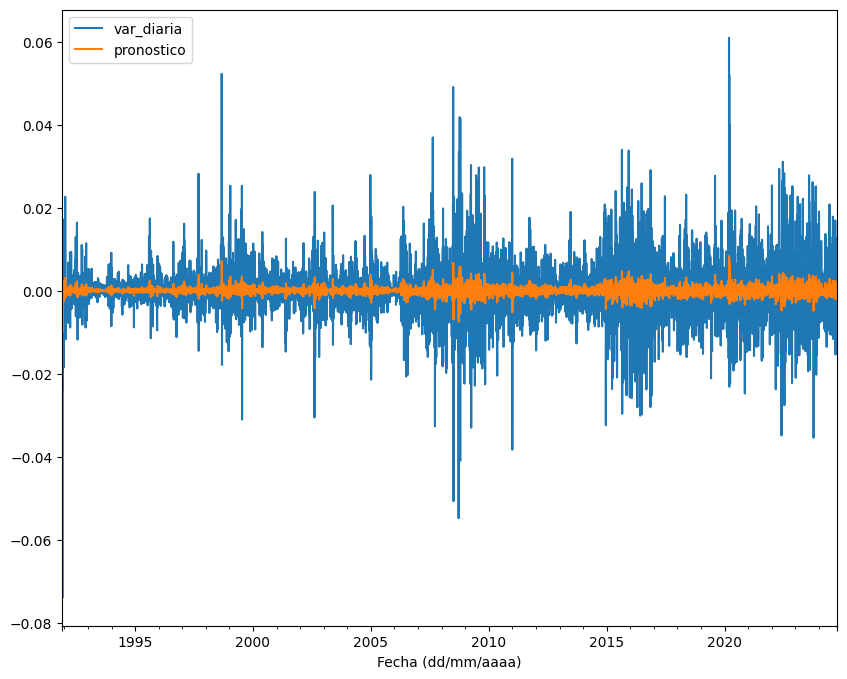

In [19]:
# modelo ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(df['var_diaria'].iloc[1:], order=(1, 0, 0))
resultados = modelo.fit()
df['pronostico'] = resultados.fittedvalues
plot = df[['var_diaria', 'pronostico']].plot(figsize=(10, 8))